In [7]:
import pandas as pd

# Load the dataset
df = pd.read_excel("coffe.xlsx")

# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffe

In [6]:
pip install openpyxl


   -------------------------------------- 250.0/250.0 kB 403.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install seaborn

   -------------------------------------- 293.3/293.3 kB 348.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


First few rows of the dataset:
   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffe

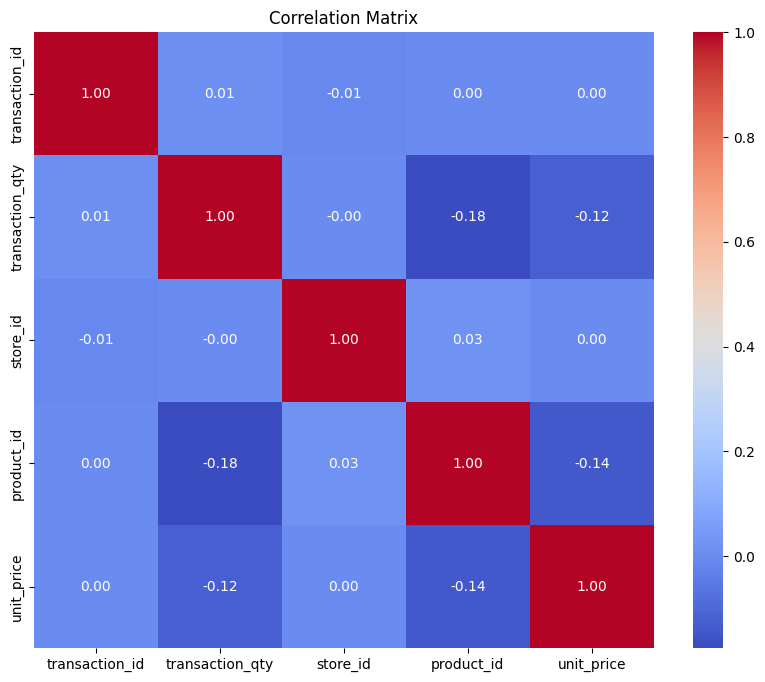

In [10]:
import pandas as pd

# Load the Excel file into a Pandas DataFrame
excel_file = "coffe.xlsx"
df = pd.read_excel(excel_file)

# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())

# Check the data types and missing values
print("\nData types and missing values:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nNumber of duplicate rows:", len(duplicate_rows))

# Check for unique values in categorical columns
print("\nUnique values in categorical columns:")
for column in df.select_dtypes(include=['object']):
    print(column, ": ", df[column].unique())

# Perform correlation analysis
correlation_matrix = df.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_excel("coffe.xlsx")

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str))

# Drop the original 'transaction_date' and 'transaction_time' columns
df.drop(['transaction_date', 'transaction_time'], axis=1, inplace=True)

# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head())

# 1. Transaction Analysis
# Calculate total sales revenue
total_revenue = (df['unit_price'] * df['transaction_qty']).sum()
print("\nTotal sales revenue: $", total_revenue)

# Determine the most popular products by transaction quantity
popular_products = df.groupby('product_detail')['transaction_qty'].sum().nlargest(5)
print("\nTop 5 most popular products by transaction quantity:")
print(popular_products)

# 2. Store Analysis
# Compare sales performance across different store locations
store_sales = df.groupby('store_location')['unit_price'].sum().nlargest(5)
print("\nSales performance across store locations:")
print(store_sales)

# 3. Product Analysis
# Analyze sales distribution by product category and product type
product_sales = df.groupby(['product_category', 'product_type'])['unit_price'].sum().nlargest(5)
print("\nSales distribution by product category and type:")
print(product_sales)

# 4. Time Analysis
# Analyze transaction patterns by time of day
df['hour'] = df['transaction_datetime'].dt.hour
hourly_sales = df.groupby('hour')['unit_price'].sum()
print("\nHourly sales distribution:")
print(hourly_sales)

# 5. Customer Analysis
# Analyze customer behavior
customer_behavior = df.groupby('transaction_id')['unit_price'].sum()
print("\nCustomer behavior:")
print(customer_behavior.describe())

# 6. Price Analysis
# Evaluate the impact of unit price on transaction quantity or revenue
price_analysis = df[['unit_price', 'transaction_qty']].corr().iloc[0, 1]
print("\nCorrelation between unit price and transaction quantity:", price_analysis)

# 7. Association Analysis
# Conduct market basket analysis
basket = df.groupby('transaction_id')['product_detail'].apply(list)
print("\nMarket basket analysis:")
print(basket)

# 8. Profitability Analysis
# Calculate profit margins for each product category or product type
df['total_price'] = df['unit_price'] * df['transaction_qty']
profitability_analysis = df.groupby('product_category')['total_price'].mean().nlargest(5)
print("\nProfit margins by product category:")
print(profitability_analysis)


First few rows of the dataset:
   transaction_id  transaction_qty  store_id   store_location  product_id  \
0               1                2         5  Lower Manhattan          32   
1               2                2         5  Lower Manhattan          57   
2               3                2         5  Lower Manhattan          59   
3               4                1         5  Lower Manhattan          22   
4               5                2         5  Lower Manhattan          57   

   unit_price    product_category           product_type  \
0         3.0              Coffee  Gourmet brewed coffee   
1         3.1                 Tea        Brewed Chai tea   
2         4.5  Drinking Chocolate          Hot chocolate   
3         2.0              Coffee            Drip coffee   
4         3.1                 Tea        Brewed Chai tea   

                product_detail transaction_datetime  
0                  Ethiopia Rg  2023-01-01 07:06:11  
1     Spicy Eye Opener Chai Lg  2023-

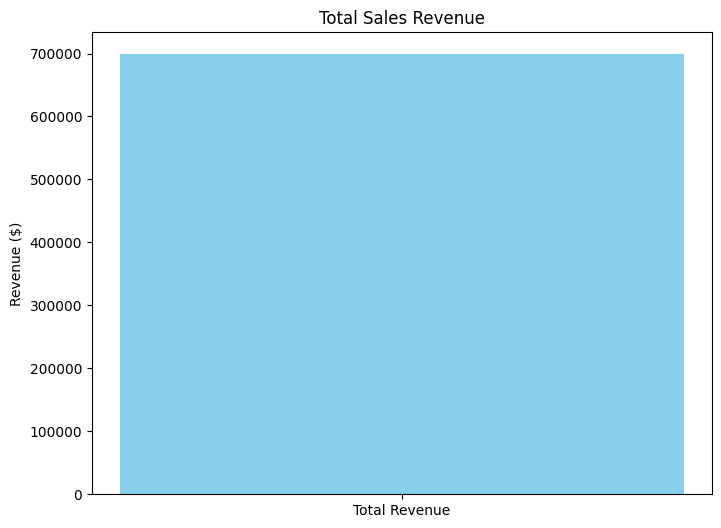

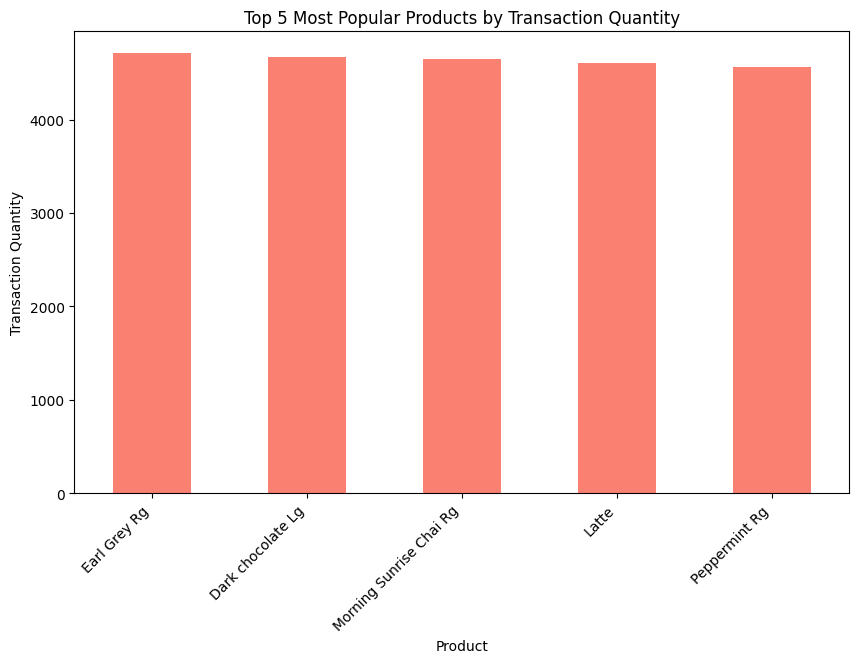

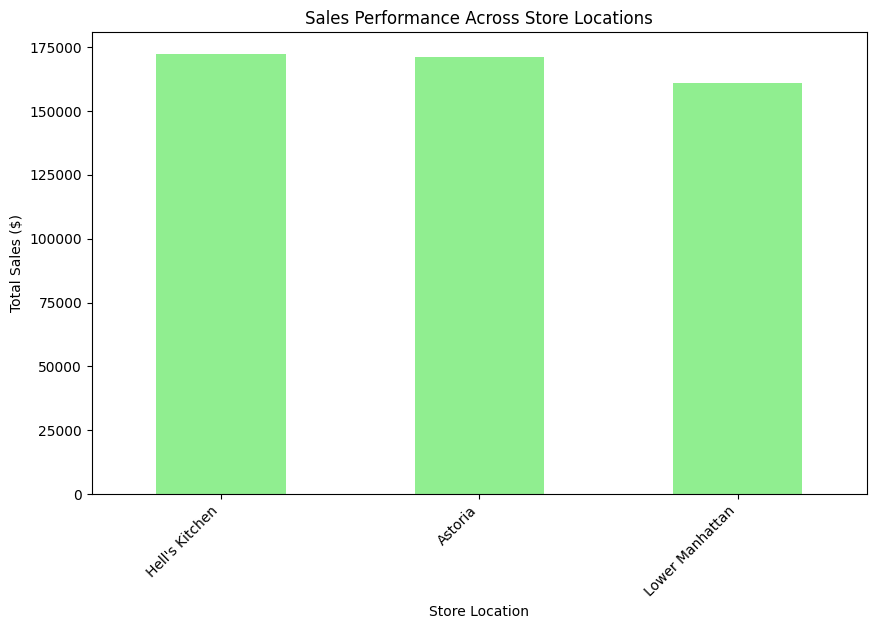

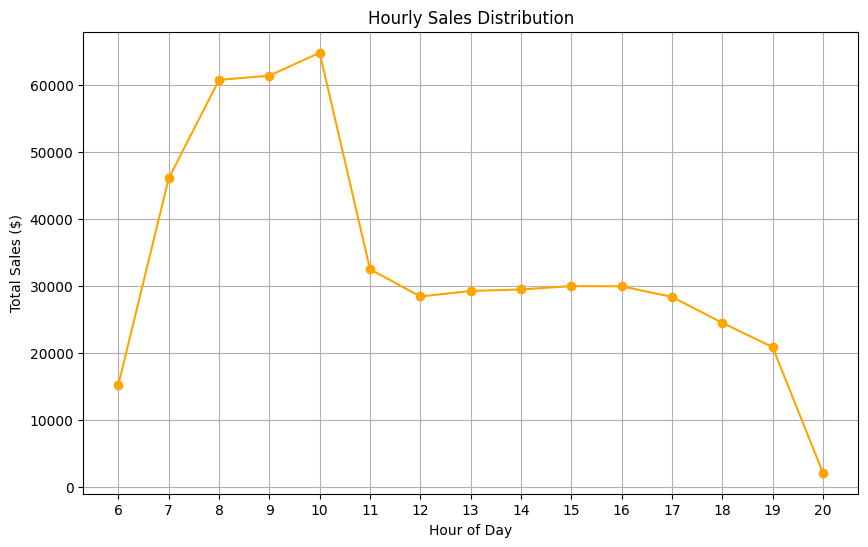

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel("coffe.xlsx")

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str))

# Drop the original 'transaction_date' and 'transaction_time' columns
df.drop(['transaction_date', 'transaction_time'], axis=1, inplace=True)

# 1. Transaction Analysis
# Calculate total sales revenue
total_revenue = (df['unit_price'] * df['transaction_qty']).sum()

# 2. Determine the most popular products by transaction quantity
popular_products = df.groupby('product_detail')['transaction_qty'].sum().nlargest(5)

# 3. Store Analysis
# Compare sales performance across different store locations
store_sales = df.groupby('store_location')['unit_price'].sum().nlargest(5)

# 4. Time Analysis
# Analyze transaction patterns by time of day
df['hour'] = df['transaction_datetime'].dt.hour
hourly_sales = df.groupby('hour')['unit_price'].sum()

# Visualization

# Total sales revenue
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue'], [total_revenue], color='skyblue')
plt.title('Total Sales Revenue')
plt.ylabel('Revenue ($)')
plt.show()

# Top 5 most popular products
plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar', color='salmon')
plt.title('Top 5 Most Popular Products by Transaction Quantity')
plt.xlabel('Product')
plt.ylabel('Transaction Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

# Sales performance across store locations
plt.figure(figsize=(10, 6))
store_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales Performance Across Store Locations')
plt.xlabel('Store Location')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Hourly sales distribution
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Hourly Sales Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales ($)')
plt.xticks(hourly_sales.index)
plt.grid(True)
plt.show()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create a directory to save the images
if not os.path.exists("images"):
    os.makedirs("images")

# Load the dataset
df = pd.read_excel("coffe.xlsx")

# Combine 'transaction_date' and 'transaction_time' into a single datetime column
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'].astype(str))

# Drop the original 'transaction_date' and 'transaction_time' columns
df.drop(['transaction_date', 'transaction_time'], axis=1, inplace=True)

# 1. Transaction Analysis
# Calculate total sales revenue
total_revenue = (df['unit_price'] * df['transaction_qty']).sum()

# 2. Determine the most popular products by transaction quantity
popular_products = df.groupby('product_detail')['transaction_qty'].sum().nlargest(5)

# 3. Store Analysis
# Compare sales performance across different store locations
store_sales = df.groupby('store_location')['unit_price'].sum().nlargest(5)

# 4. Time Analysis
# Analyze transaction patterns by time of day
df['hour'] = df['transaction_datetime'].dt.hour
hourly_sales = df.groupby('hour')['unit_price'].sum()

# Visualization

# Total sales revenue
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue'], [total_revenue], color='skyblue')
plt.title('Total Sales Revenue')
plt.ylabel('Revenue ($)')
plt.savefig('images/total_sales_revenue.png')  # Save the plot as an image
plt.close()

# Top 5 most popular products
plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar', color='salmon')
plt.title('Top 5 Most Popular Products by Transaction Quantity')
plt.xlabel('Product')
plt.ylabel('Transaction Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/most_popular_products.png')  # Save the plot as an image
plt.close()

# Sales performance across store locations
plt.figure(figsize=(10, 6))
store_sales.plot(kind='bar', color='lightgreen')
plt.title('Sales Performance Across Store Locations')
plt.xlabel('Store Location')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/sales_performance_store_locations.png')  # Save the plot as an image
plt.close()

# Hourly sales distribution
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Hourly Sales Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales ($)')
plt.xticks(hourly_sales.index)
plt.grid(True)
plt.tight_layout()
plt.savefig('images/hourly_sales_distribution.png')  # Save the plot as an image
plt.close()